# Adaline and Madaline

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tabulate import tabulate
import tqdm
import copy

## IRIS Dataset

In [2]:
iris = datasets.load_iris(return_X_y=False)
X = iris.data
# Standardized features
sc = StandardScaler()
X_normalized = sc.fit_transform(X)
data = pd.DataFrame(data=X_normalized, columns=iris.feature_names)
data['target'] = iris.target
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### Plotting the data

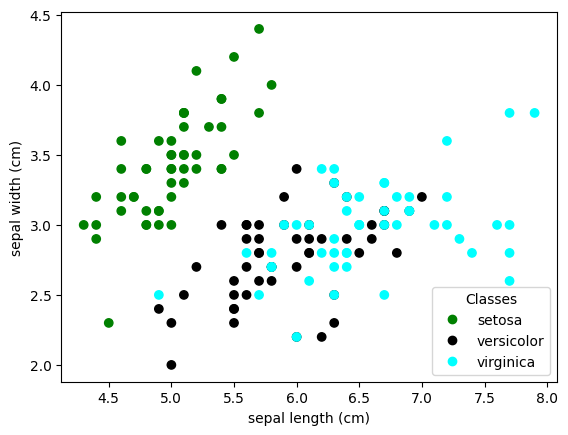

In [4]:
_, ax = plt.subplots()
cmap = matplotlib.colors.ListedColormap(["green", "black", "cyan"])
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target, cmap=cmap)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

### Train-Test Split

In [5]:
# make a copy of iris dataset in which targets are setosa and non-setosa
iris_setosa = data.copy()
iris_setosa['target'] = np.where(iris_setosa['target'] == 0, -1, 1)

# Select only two features: Sepal length (0) and Sepal width (1)
X_setosa = iris_setosa.iloc[:, [0, 1]].values
y_setosa = iris_setosa['target'].values

In [6]:
# make a copy of iris dataset in which targets are versicolor  and non-versicolor
iris_versicolor = data.copy()
iris_versicolor['target'] = np.where(iris_versicolor['target'] == 1, -1, 1)

# Select only two features: Sepal length (0) and Sepal width (1)
X_versicolor = iris_versicolor.iloc[:, [0, 1]].values
y_versicolor = iris_versicolor['target'].values

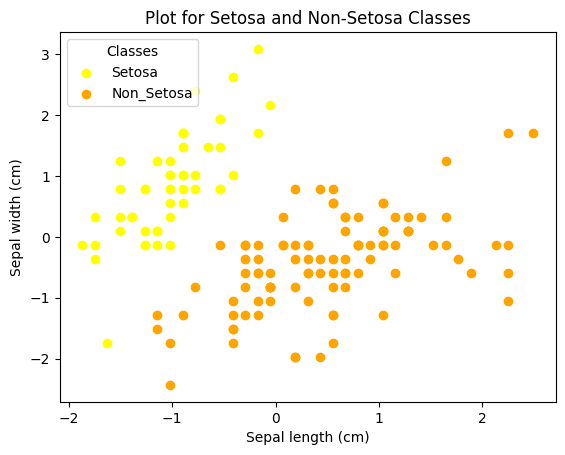

In [7]:
plt.scatter(X_setosa[y_setosa == -1][:, 0], X_setosa[y_setosa == -1][:, 1], color='yellow',label='Setosa')
plt.scatter(X_setosa[y_setosa == 1][:, 0], X_setosa[y_setosa == 1][:, 1], color='orange', label='Non_Setosa')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(loc='upper left', title="Classes")
plt.title('Plot for Setosa and Non-Setosa Classes')
plt.show()

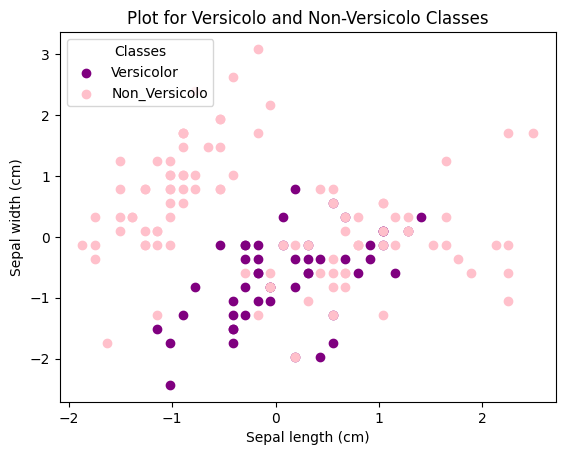

In [8]:
plt.scatter(X_versicolor[y_versicolor == -1][:, 0], X_versicolor[y_versicolor == -1][:, 1], color='purple',label='Versicolor')
plt.scatter(X_versicolor[y_versicolor == 1][:, 0], X_versicolor[y_versicolor == 1][:, 1], color='pink', label='Non_Versicolo')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend(loc='upper left', title="Classes")
plt.title('Plot for Versicolo and Non-Versicolo Classes')
plt.show()

In [9]:
# Splitting the dataset to train and test
X_train_setosa, X_test_setosa, y_train_setosa, y_test_setosa = train_test_split(
    X_setosa, y_setosa, test_size=0.2, random_state=42
)

In [10]:
# Splitting the dataset to train and test
X_train_versicolor, X_test_versicolor, y_train_versicolor, y_test_versicolor = train_test_split(
    X_versicolor, y_versicolor, test_size=0.2, random_state=42
)

## Adaline

Now we need to train an adaline network on this dataset to classify the Setosa class from the other two classes. We need to plot error decrease with epochs which is 
$$ E = \frac{1}{2} (t - net)^{2} $$ 

In [11]:
class Adaline:
    def __init__(self, learning_rate=0.001, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, X, y):
        self.bias = 0
        self.weights = np.random.rand(X.shape[1]) * 0.01 # multiply by 0.01 to get small numbers for weights
        self.cost = []

        for _ in tqdm.tqdm(range(self.epochs)):
            output = self.activation(X)
            errors = y - output
            self.weights += self.learning_rate * X.T.dot(errors)
            self.bias += self.learning_rate * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost.append(cost)         
        return self
    
    def activation(self, X):
        return np.dot(X, self.weights) + self.bias
    
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)
    
    def plot_decision_boundary(self, X, y, label, model, resolution=0.01):
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        x1_, x2_ = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

        Z = model.predict(np.array([x1_.ravel(), x2_.ravel()]).T)
        Z = Z.reshape(x1_.shape)
        
        plt.contourf(x1_, x2_, Z, alpha=0.3, colors=['orange', 'yellow']) 
        lb = 'Non_' + label
        plt.scatter(X[y == -1][:, 0], X[y == -1][:, 1], color='purple',label=label)
        plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='pink', label=lb)
        plt.xlabel('Sepal length (cm)')
        plt.ylabel('Sepal width (cm)')
        plt.title('Adaline Decision Boundary')
        plt.legend(loc='upper left', title="Classes")

## Results for Setosa and Non-Setosa Classes

100%|██████████| 100/100 [00:00<00:00, 18242.45it/s]


╒══════════╤════════════════════╤══════════════╕
│          │ Train dataset      │ Test dataset │
├──────────┼────────────────────┼──────────────┤
│ Accuracy │ 0.9916666666666667 │ 1.0          │
╘══════════╧════════════════════╧══════════════╛


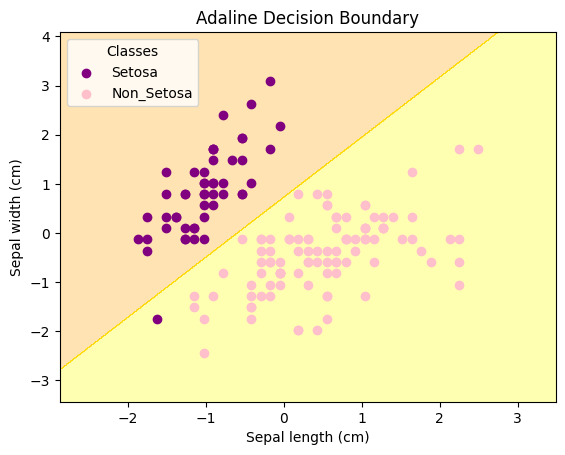

In [14]:
model = Adaline()
model.fit(X_train_setosa, y_train_setosa)

# Make predictions on the test set
y_test_pred = model.predict(X_test_setosa)
y_train_pred = model.predict(X_train_setosa)

# Calculate and print accuracy
accuracy_test = accuracy_score(y_test_setosa, y_test_pred)
accuracy_train = accuracy_score(y_train_setosa, y_train_pred)

table = [[" ", "Train dataset", "Test dataset"], ["Accuracy", accuracy_train, accuracy_test]]
print(tabulate(table, tablefmt="fancy_grid"))

model.plot_decision_boundary(X_setosa, y_setosa, "Setosa", model)

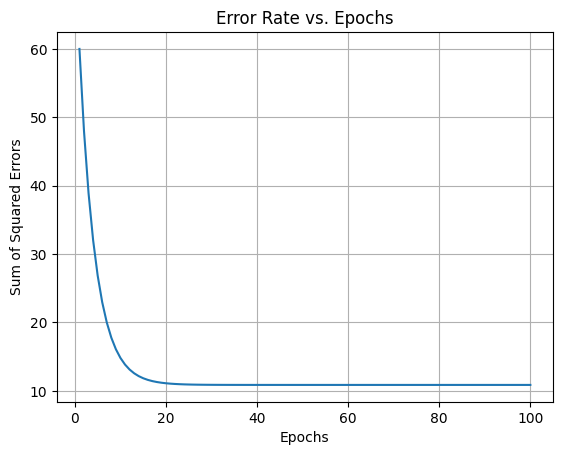

In [170]:
# Plot the error rate
plt.plot(range(1, len(model.cost) + 1), model.cost)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Error Rate vs. Epochs')
plt.grid()
plt.show()

## Results for Versicolo and Non-Versicolo Classes

100%|██████████| 100/100 [00:00<00:00, 22535.48it/s]


╒══════════╤════════════════════╤════════════════════╕
│          │ Train dataset      │ Test dataset       │
├──────────┼────────────────────┼────────────────────┤
│ Accuracy │ 0.7083333333333334 │ 0.7333333333333333 │
╘══════════╧════════════════════╧════════════════════╛


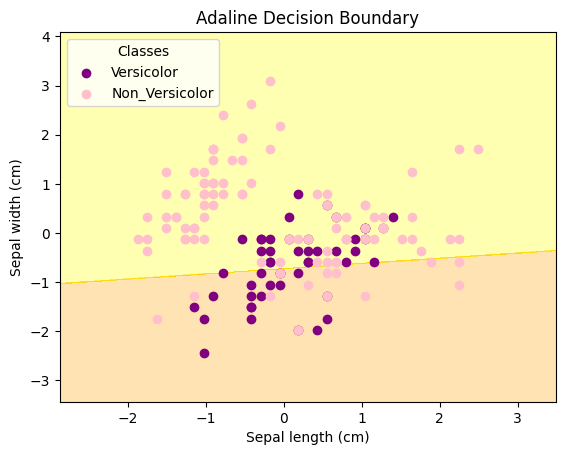

In [15]:
model = Adaline()
model.fit(X_train_versicolor, y_train_versicolor)

# Make predictions on the test set
y_test_pred = model.predict(X_test_versicolor)
y_train_pred = model.predict(X_train_versicolor)

# Calculate and print accuracy
accuracy_test = accuracy_score(y_test_versicolor, y_test_pred)
accuracy_train = accuracy_score(y_train_versicolor, y_train_pred)

table = [[" ", "Train dataset", "Test dataset"], ["Accuracy", accuracy_train, accuracy_test]]
print(tabulate(table, tablefmt="fancy_grid"))

model.plot_decision_boundary(X_versicolor, y_versicolor, "Versicolor", model)

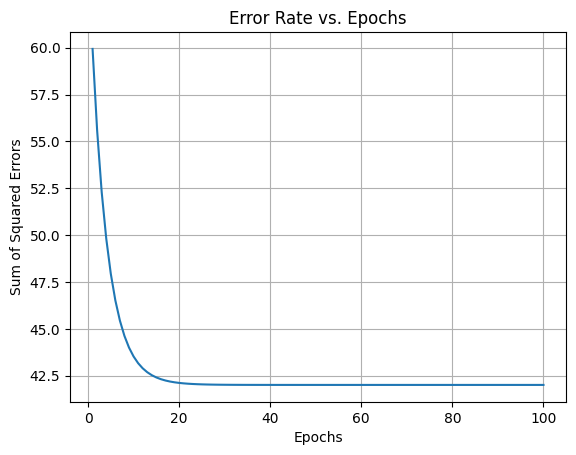

In [16]:
# Plot the error rate
plt.plot(range(1, len(model.cost) + 1), model.cost)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Error Rate vs. Epochs')
plt.grid()
plt.show()

## Madaline

In [173]:
class MADALINE():
    def __init__(self, num_hidden_neurons, epochs=1000, learning_rate=0.1):
        self.num_hidden_neurons = num_hidden_neurons
        self.epochs = epochs
        self.learning_rate = learning_rate

        # step0: initialize weights to some small random vlaue
        np.random.seed(10)
        self.hidden_weights = np.random.rand(num_hidden_neurons, 2)   # w
        self.output_weights = [1] * num_hidden_neurons   # v
        self.hidden_biases = np.random.rand(num_hidden_neurons, 1)
        self.output_bias = num_hidden_neurons - 1

    def fit(self, X, Y):
        self.cost = []
        count = 0
        self.old_weights = copy.deepcopy(self.hidden_weights)
        for epoch in range(self.epochs):
            epoch_cost = []
            for x, label in zip(X, Y):
                # Compute net input to hiddel Adaline layers
                # z_in = b + ∑wT*x.
                z_in = np.array([np.matmul(x, self.hidden_weights.T)]).T + self.hidden_biases
                # Compute net ouput to Adaline hidde layer
                # z = f(z_in)
                z = self.step_activation(z_in)
                # compute input to ouput layer
                # y_in = z_in = b + ∑vT*x.
                y_in = np.dot(np.squeeze(z), np.squeeze(self.output_weights)) + self.output_bias
                # compute output
                # y = f(y_in)
                y = self.step_activation(y_in)
                # if y == label then we get correct result so no updates are needed.
                if y != label:
                    # if label was 1 and we get -1 then we should update weights where net input is closest to 0 
                    if label == 1:
                        z_j = max(z_in)
                        ind = np.where(z_in == z_j)
                        delta = self.learning_rate * (1 - z_in[ind]) * np.array(x)
                        self.hidden_weights[ind, :] = self.hidden_weights[ind, :] + delta
                        self.hidden_biases[ind] = self.hidden_biases[ind] + self.learning_rate * (1 - z_in[ind])
                    # if label was -1 and we get 1 then we should update weights with positive input.
                    else:
                        ind = [i for i, x in enumerate(z_in) if x > 0]
                        for indice in ind:
                            delta = self.learning_rate * (-1 - z_in[indice]) * np.array(x)
                            self.hidden_weights[indice, :] = self.hidden_weights[indice, :] + delta
                            self.hidden_biases[indice] = self.hidden_biases[indice] + self.learning_rate * (-1 - z_in[indice])

                epoch_cost.append(((label-y)**2).sum()/2.0)

            self.cost.append(np.array(epoch_cost).sum())

            if np.all(np.abs(self.old_weights - self.hidden_weights) < 0.001) and epoch > 20:
                count += 1
                if count >= 10:
                    print("Converged at epoch: ", epoch)
                    break


    def predict(self, X):
        y = []
        for x in X:
            z_in = np.array([np.matmul(x, self.hidden_weights.T)]).T + self.hidden_biases
            z = self.step_activation(z_in)
            y_in = np.dot(np.squeeze(z), np.squeeze(self.output_weights)) + self.output_bias
            y.append(self.step_activation(y_in))
        return y
    
    def step_activation(self, x):
        return np.where(x >= 0, 1, -1)
    
    def plot_decision_boundary(self, X, Y):
        for i in range(self.num_hidden_neurons):
            plt.axline((0, float(-self.hidden_biases[i] / self.hidden_weights[i][1])), slope=-self.hidden_weights[i][0] / self.hidden_weights[i][1], color="r")
        plt.scatter(X[Y == 0] [:, 0], X[Y == 0] [:, 1], color='red', label='Class 0')
        plt.scatter(X[Y == 1] [:, 0], X[Y == 1] [:, 1], color='blue', label='Class 1')

        h = 0.02
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        Z = np.array(self.predict(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
        plt.legend()

        plt.xlim([-2, 3])
        plt.ylim([-1, 1.7])
        plt.show()
        

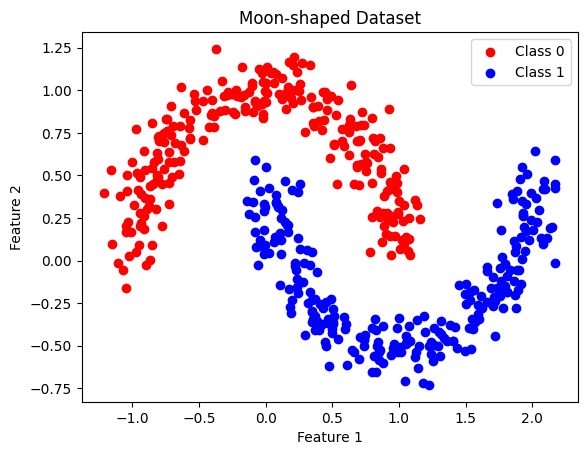

In [174]:
# loading dataset
from sklearn.datasets import make_moons
X_moons, Y_moons = make_moons (n_samples=500, noise=0.1, random_state=42)
X_train_moons, X_test_moons, Y_train_moons, Y_test_moons = train_test_split (X_moons,
                                                                Y_moons, test_size=0.5, random_state=3)
plt.scatter(X_moons [Y_moons == 0] [:, 0], X_moons [Y_moons == 0] [:, 1], color='red', label='Class 0')
plt.scatter(X_moons [Y_moons == 1] [:, 0], X_moons [Y_moons == 1] [:, 1], color='blue', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title("Moon-shaped Dataset")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of hidden neurons: 3

Epoch: 500, Learning Rate: 0.01

Accuracy: 0.9


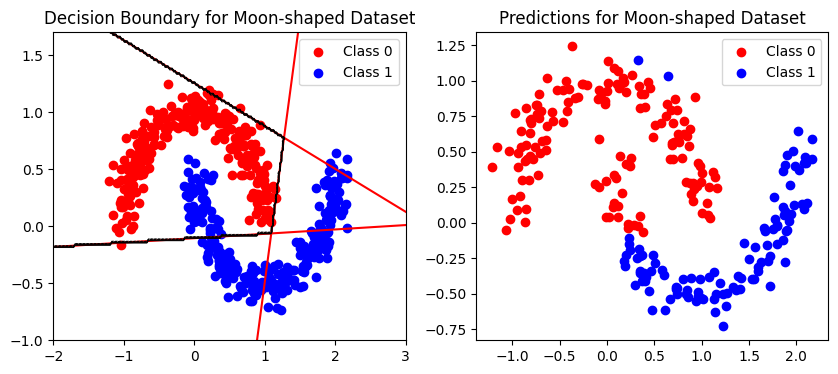

In [175]:
n = 3
ep = 500
lr = 0.01
model = MADALINE(n, ep, lr)
model.fit(X_train_moons, Y_train_moons)
pred = model.predict(X_test_moons)
pred = np.array(pred)
pred[pred == -1] = 0
accuracy = accuracy_score(pred, Y_test_moons)
print(f'Number of hidden neurons: {n}')
print(f'Epoch: {ep}, Learning Rate: {lr}')
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.scatter(X_test_moons[pred == 0][:, 0], X_test_moons[pred == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test_moons[pred == 1][:, 0], X_test_moons[pred == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("Predictions for Moon-shaped Dataset")
ax.legend()
ax.set_title("Predictions for Moon-shaped Dataset")

plt.subplot(1, 2, 1)
for i in range(n):
    plt.axline((0, float(-model.hidden_biases[i] / model.hidden_weights[i][1])), slope=-model.hidden_weights[i][0] / model.hidden_weights[i][1], color="r")
plt.scatter(X_moons[Y_moons == 0] [:, 0], X_moons[Y_moons == 0] [:, 1], color='red', label='Class 0')
plt.scatter(X_moons[Y_moons == 1] [:, 0], X_moons[Y_moons == 1] [:, 1], color='blue', label='Class 1')
h = 0.02
x_min, x_max = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
y_min, y_max = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
plt.legend()
plt.xlim([-2, 3])
plt.ylim([-1, 1.7])
plt.title("Decision Boundary for Moon-shaped Dataset")

plt.show()

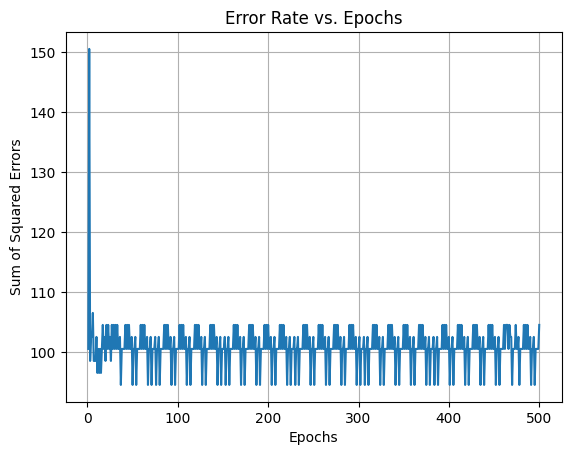

In [176]:
# Plot the error rate
plt.plot(range(1, len(model.cost) + 1), model.cost)
plt.xlabel('Epochs')
plt.ylabel('Sum of Squared Errors')
plt.title('Error Rate vs. Epochs')
plt.grid()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of hidden neurons: 5

Epoch: 500, Learning Rate: 0.01

Accuracy: 0.888


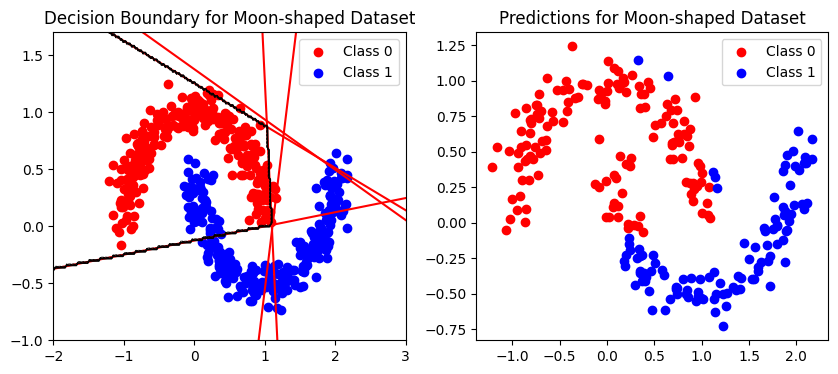

In [177]:
n = 5
ep = 500
lr = 0.01
model = MADALINE(n, ep, lr)
model.fit(X_train_moons, Y_train_moons)
pred = model.predict(X_test_moons)
pred = np.array(pred)
pred[pred == -1] = 0
accuracy = accuracy_score(pred, Y_test_moons)
print(f'Number of hidden neurons: {n}')
print(f'Epoch: {ep}, Learning Rate: {lr}')
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.scatter(X_test_moons[pred == 0][:, 0], X_test_moons[pred == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test_moons[pred == 1][:, 0], X_test_moons[pred == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("Predictions for Moon-shaped Dataset")
ax.legend()
ax.set_title("Predictions for Moon-shaped Dataset")

plt.subplot(1, 2, 1)
for i in range(n):
    plt.axline((0, float(-model.hidden_biases[i] / model.hidden_weights[i][1])), slope=-model.hidden_weights[i][0] / model.hidden_weights[i][1], color="r")
plt.scatter(X_moons[Y_moons == 0] [:, 0], X_moons[Y_moons == 0] [:, 1], color='red', label='Class 0')
plt.scatter(X_moons[Y_moons == 1] [:, 0], X_moons[Y_moons == 1] [:, 1], color='blue', label='Class 1')
h = 0.02
x_min, x_max = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
y_min, y_max = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
plt.legend()
plt.xlim([-2, 3])
plt.ylim([-1, 1.7])
plt.title("Decision Boundary for Moon-shaped Dataset")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Number of hidden neurons: 8

Epoch: 500, Learning Rate: 0.01

Accuracy: 0.872


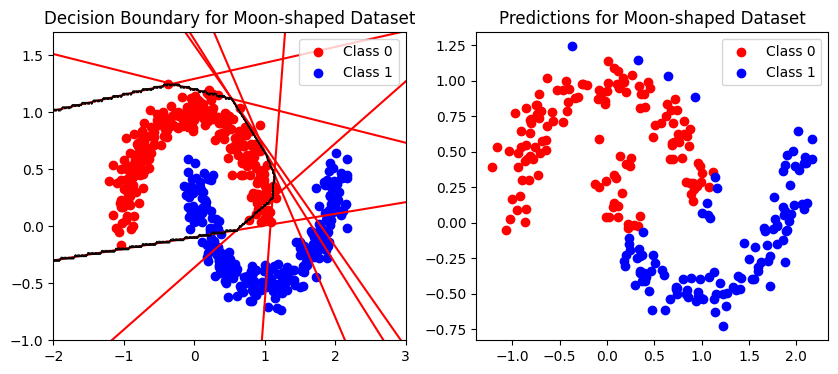

In [178]:
n = 8
ep = 500
lr = 0.01
model = MADALINE(n, ep, lr)
model.fit(X_train_moons, Y_train_moons)
pred = model.predict(X_test_moons)
pred = np.array(pred)
pred[pred == -1] = 0
accuracy = accuracy_score(pred, Y_test_moons)
print(f'Number of hidden neurons: {n}')
print(f'Epoch: {ep}, Learning Rate: {lr}')
print(f'Accuracy: {accuracy}')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 2)
plt.scatter(X_test_moons[pred == 0][:, 0], X_test_moons[pred == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_test_moons[pred == 1][:, 0], X_test_moons[pred == 1][:, 1], color='blue', label='Class 1')
plt.legend()
plt.title("Predictions for Moon-shaped Dataset")
ax.legend()
ax.set_title("Predictions for Moon-shaped Dataset")

plt.subplot(1, 2, 1)
for i in range(n):
    plt.axline((0, float(-model.hidden_biases[i] / model.hidden_weights[i][1])), slope=-model.hidden_weights[i][0] / model.hidden_weights[i][1], color="r")
plt.scatter(X_moons[Y_moons == 0] [:, 0], X_moons[Y_moons == 0] [:, 1], color='red', label='Class 0')
plt.scatter(X_moons[Y_moons == 1] [:, 0], X_moons[Y_moons == 1] [:, 1], color='blue', label='Class 1')
h = 0.02
x_min, x_max = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
y_min, y_max = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
plt.legend()
plt.xlim([-2, 3])
plt.ylim([-1, 1.7])
plt.title("Decision Boundary for Moon-shaped Dataset")

plt.show()

### Different hyperparameters for Madaline with 3 hidden layers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.1

Accuracy = 0.892


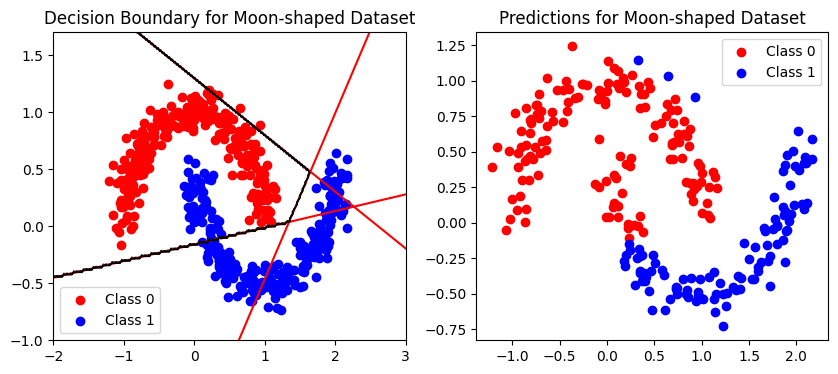

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.01

Accuracy = 0.896


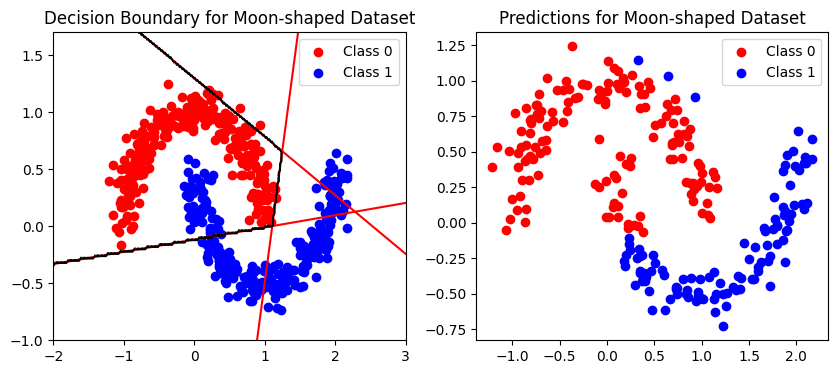

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.001

Accuracy = 0.884


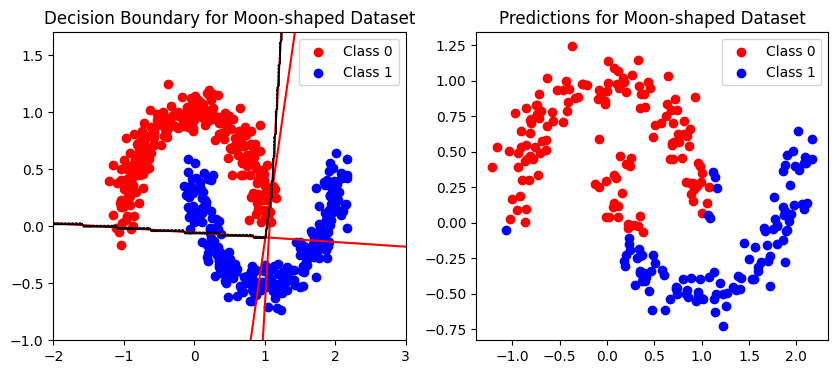

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.1

Accuracy = 0.892


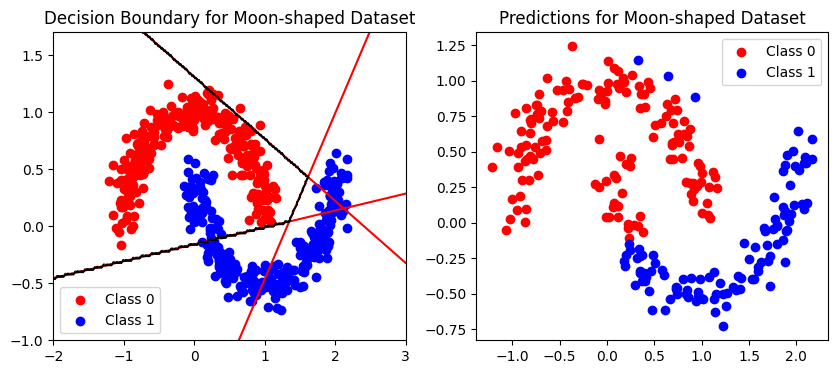

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.01

Accuracy = 0.892


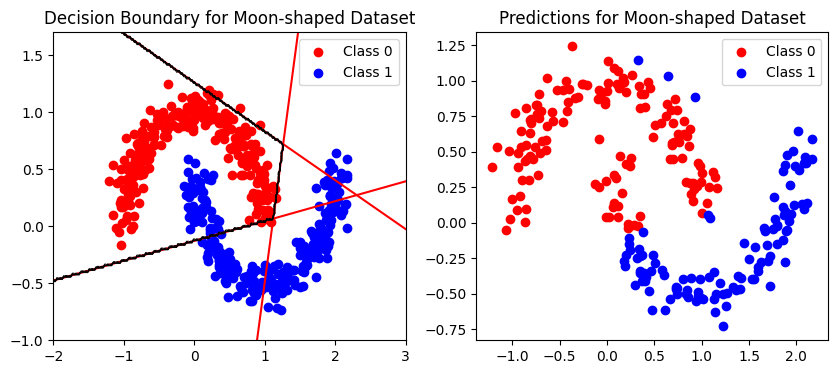

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.001

Accuracy = 0.888


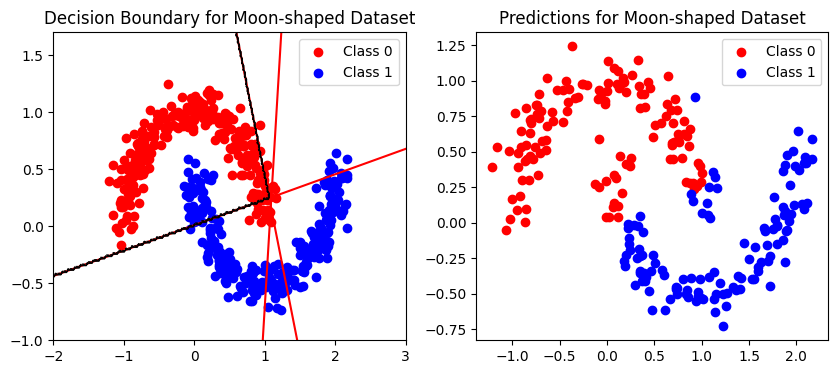

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.1

Accuracy = 0.892


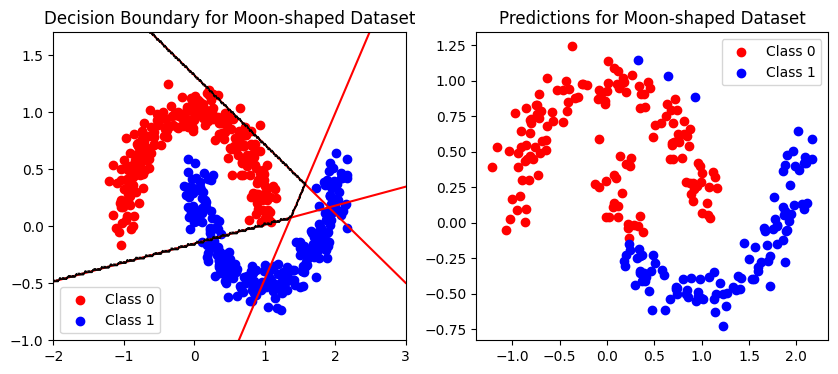

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.01

Accuracy = 0.9


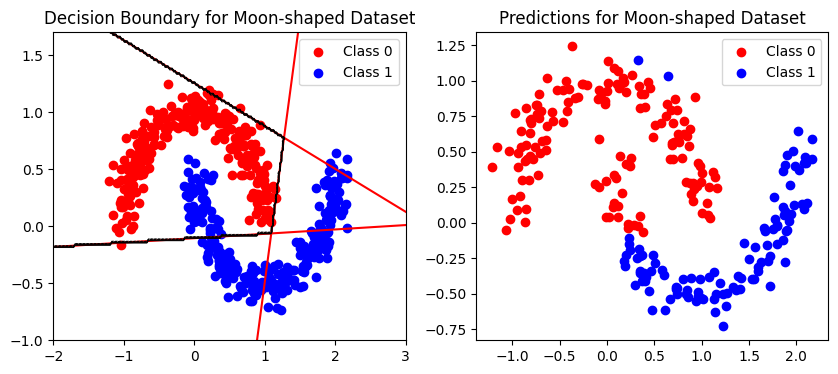

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.001

Accuracy = 0.88


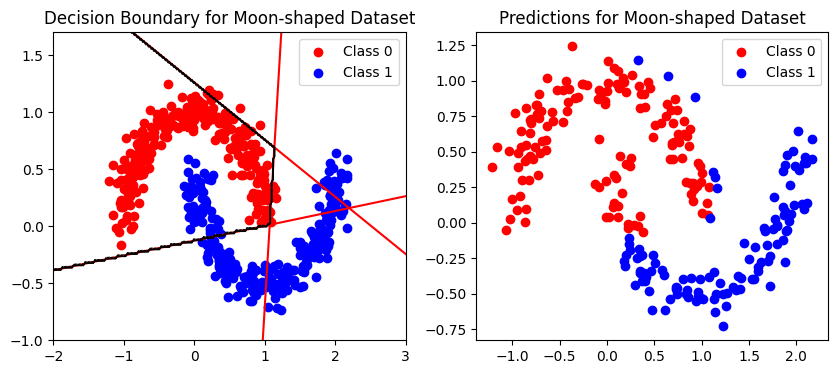

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.1

Accuracy = 0.892


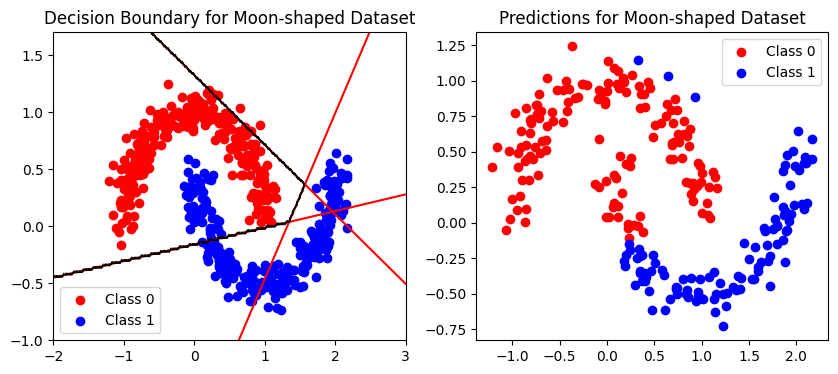

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.01

Accuracy = 0.9


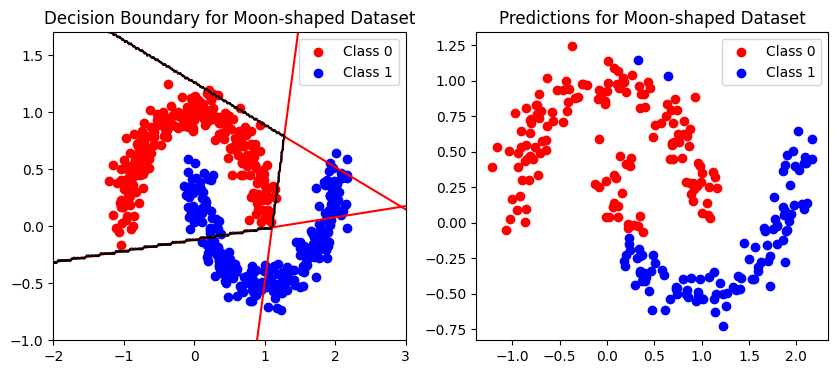

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.001

Accuracy = 0.88


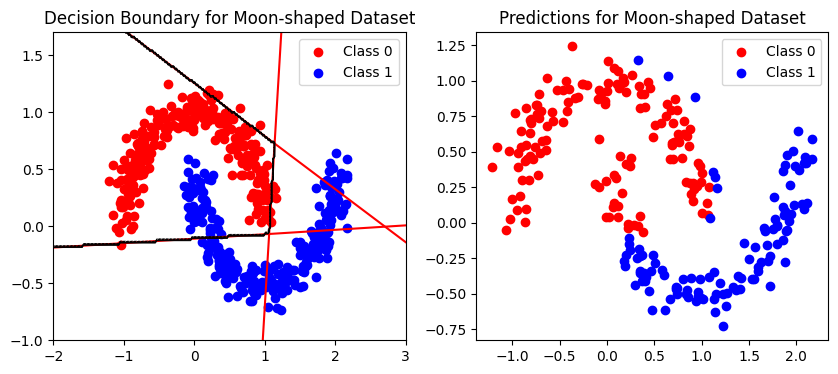

In [179]:
epoch = [50, 100, 500, 2000]
lrs = [0.1, 0.01, 0.001]
n = 3
for ep in epoch:
    for lr in lrs:
        model = MADALINE(n, ep, lr)
        model.fit(X_train_moons, Y_train_moons)
        pred = model.predict(X_test_moons)
        pred = np.array(pred)

        # change the prediction from 1 and -1 to 0 and 1
        pred[pred == -1] = 0

        accuracy = accuracy_score(pred, Y_test_moons)
        print(f'Epoch: {ep}, Learning Rate: {lr}')
        print("Accuracy =", accuracy)
        # model.plot_decision_boundary(X_moons, Y_moons)

        # plot the predictions for the test data and decision boundary in subplots
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 2)
        plt.scatter(X_test_moons[pred == 0][:, 0], X_test_moons[pred == 0][:, 1], color='red', label='Class 0')
        plt.scatter(X_test_moons[pred == 1][:, 0], X_test_moons[pred == 1][:, 1], color='blue', label='Class 1')
        plt.legend()
        plt.title("Predictions for Moon-shaped Dataset")
        ax.legend()
        ax.set_title("Predictions for Moon-shaped Dataset")

        plt.subplot(1, 2, 1)
        for i in range(n):
            plt.axline((0, float(-model.hidden_biases[i] / model.hidden_weights[i][1])), slope=-model.hidden_weights[i][0] / model.hidden_weights[i][1], color="r")
        plt.scatter(X_moons[Y_moons == 0] [:, 0], X_moons[Y_moons == 0] [:, 1], color='red', label='Class 0')
        plt.scatter(X_moons[Y_moons == 1] [:, 0], X_moons[Y_moons == 1] [:, 1], color='blue', label='Class 1')
        h = 0.02
        x_min, x_max = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
        y_min, y_max = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
        plt.legend()
        plt.xlim([-2, 3])
        plt.ylim([-1, 1.7])
        plt.title("Decision Boundary for Moon-shaped Dataset")

        plt.show()

        print("==========================================================")
        

### Different hyperparameters for Madaline with 5 hidden layers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.1

Accuracy = 0.864


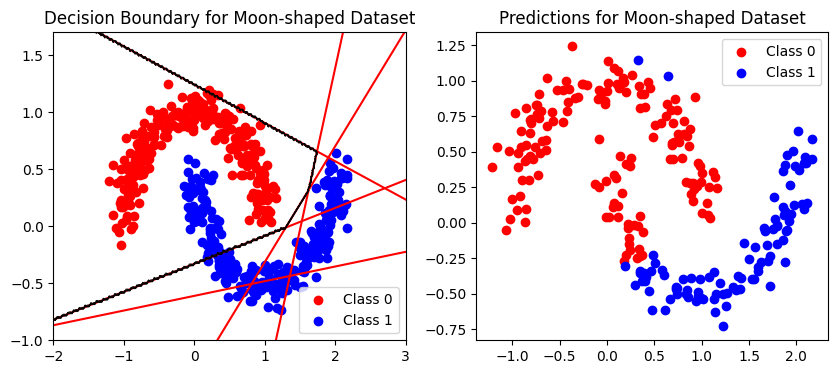

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.01

Accuracy = 0.884


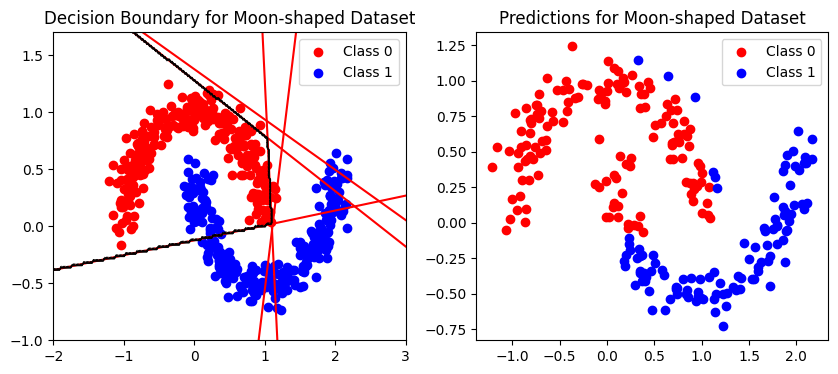

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.001

Accuracy = 0.88


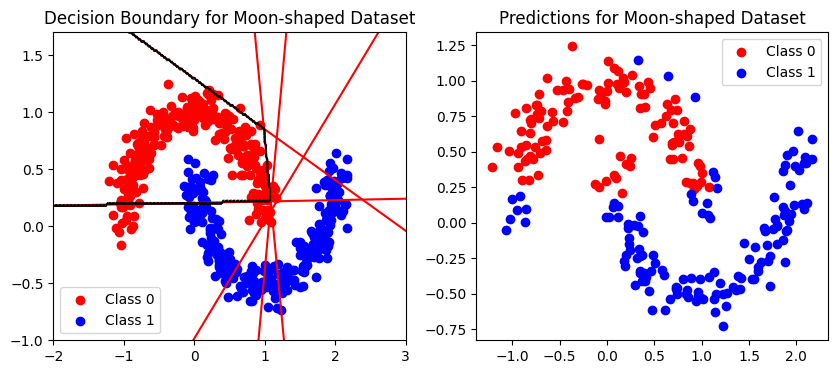

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.1

Accuracy = 0.888


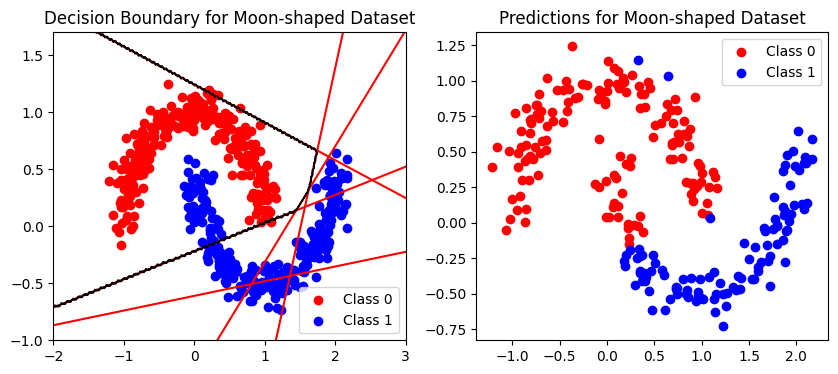

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.01

Accuracy = 0.876


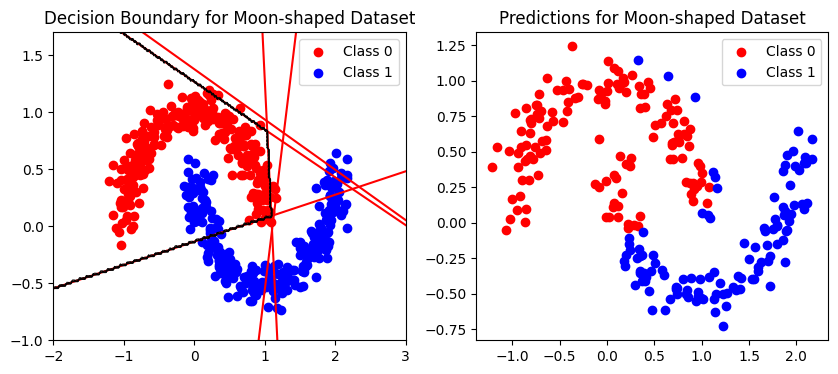

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.001

Accuracy = 0.868


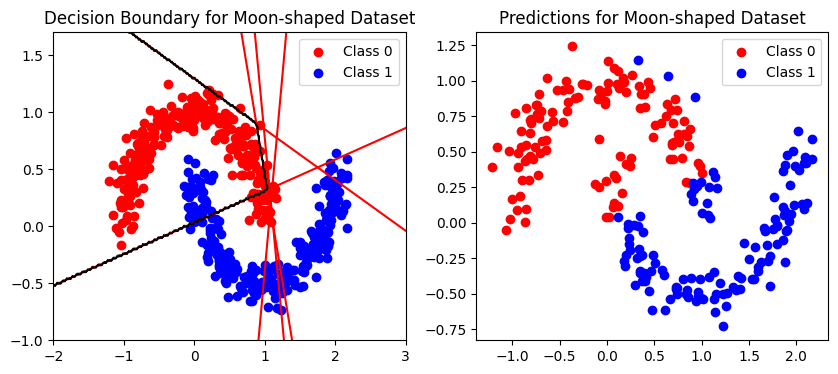

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.1

Accuracy = 0.868


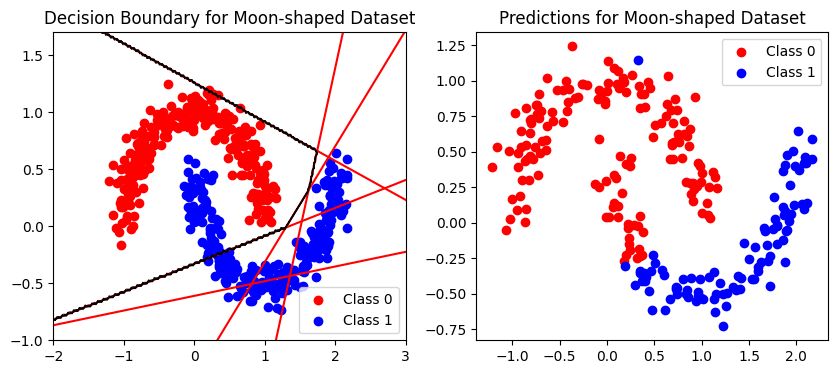

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.01

Accuracy = 0.888


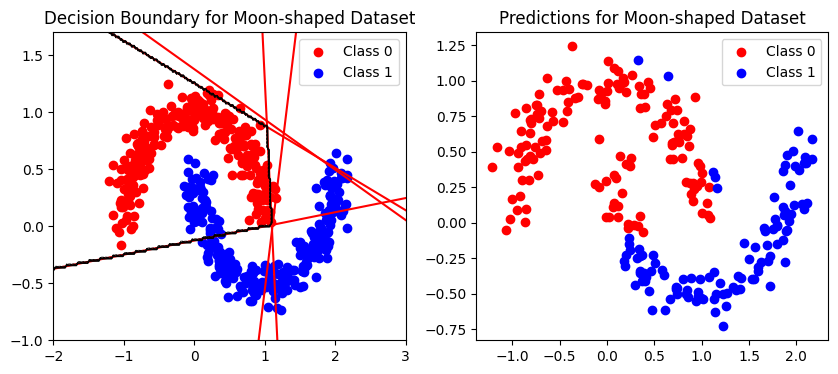

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.001

Accuracy = 0.876


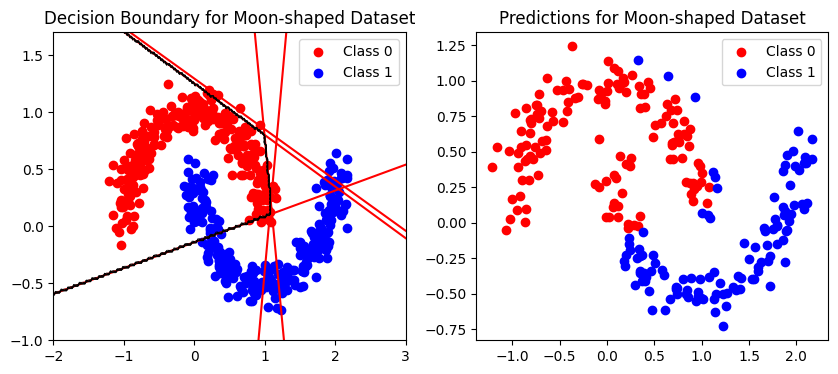

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.1

Accuracy = 0.888


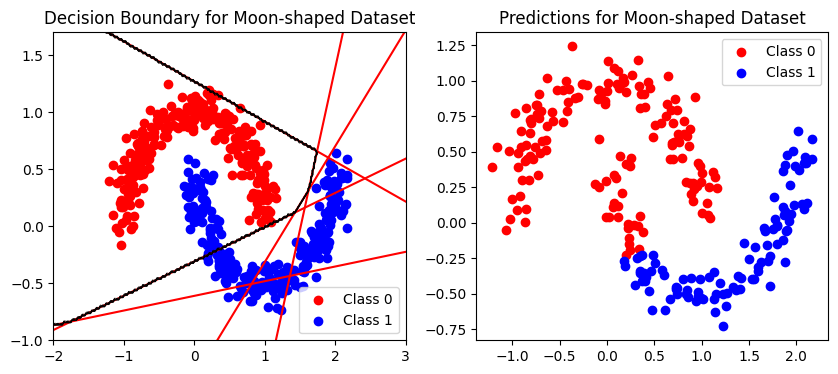

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.01

Accuracy = 0.888


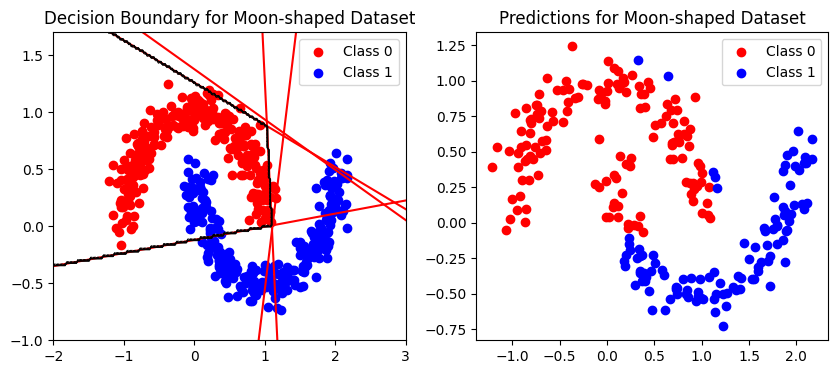

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.001

Accuracy = 0.876


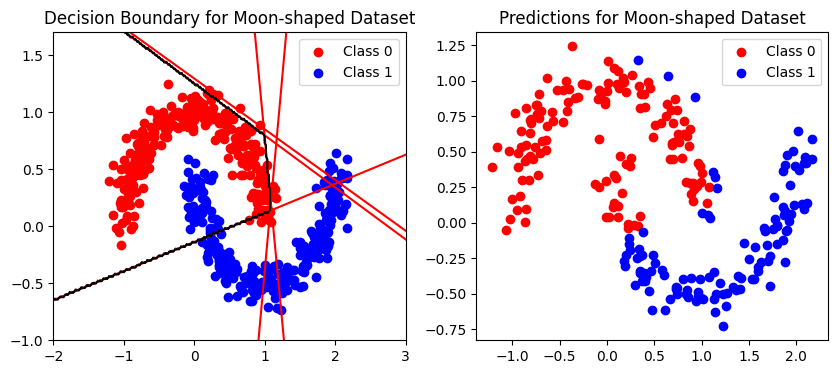

In [180]:
epoch = [50, 100, 500, 2000]
lrs = [0.1, 0.01, 0.001]
n = 5
for ep in epoch:
    for lr in lrs:
        model = MADALINE(n, ep, lr)
        model.fit(X_train_moons, Y_train_moons)
        pred = model.predict(X_test_moons)
        pred = np.array(pred)

        # change the prediction from 1 and -1 to 0 and 1
        pred[pred == -1] = 0

        accuracy = accuracy_score(pred, Y_test_moons)
        print(f'Epoch: {ep}, Learning Rate: {lr}')
        print("Accuracy =", accuracy)
        # model.plot_decision_boundary(X_moons, Y_moons)

        # plot the predictions for the test data and decision boundary in subplots
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 2)
        plt.scatter(X_test_moons[pred == 0][:, 0], X_test_moons[pred == 0][:, 1], color='red', label='Class 0')
        plt.scatter(X_test_moons[pred == 1][:, 0], X_test_moons[pred == 1][:, 1], color='blue', label='Class 1')
        plt.legend()
        plt.title("Predictions for Moon-shaped Dataset")
        ax.legend()
        ax.set_title("Predictions for Moon-shaped Dataset")

        plt.subplot(1, 2, 1)
        for i in range(n):
            plt.axline((0, float(-model.hidden_biases[i] / model.hidden_weights[i][1])), slope=-model.hidden_weights[i][0] / model.hidden_weights[i][1], color="r")
        plt.scatter(X_moons[Y_moons == 0] [:, 0], X_moons[Y_moons == 0] [:, 1], color='red', label='Class 0')
        plt.scatter(X_moons[Y_moons == 1] [:, 0], X_moons[Y_moons == 1] [:, 1], color='blue', label='Class 1')
        h = 0.02
        x_min, x_max = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
        y_min, y_max = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
        plt.legend()
        plt.xlim([-2, 3])
        plt.ylim([-1, 1.7])
        plt.title("Decision Boundary for Moon-shaped Dataset")

        plt.show()

        print("==========================================================")
        

### Different hyperparameters for Madaline with 8 hidden layers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.1

Accuracy = 0.892


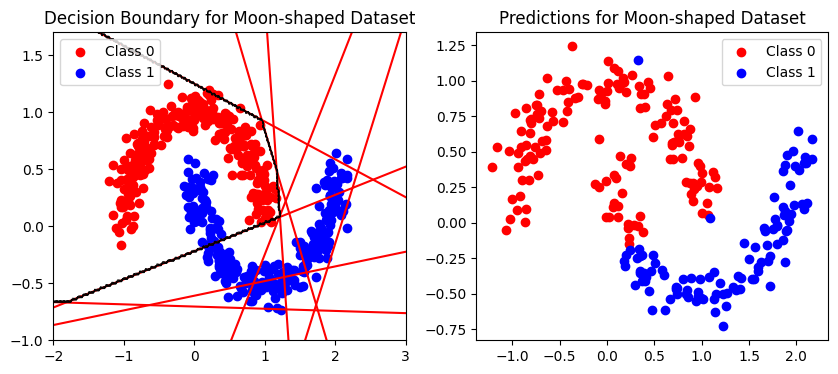

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.01

Accuracy = 0.888


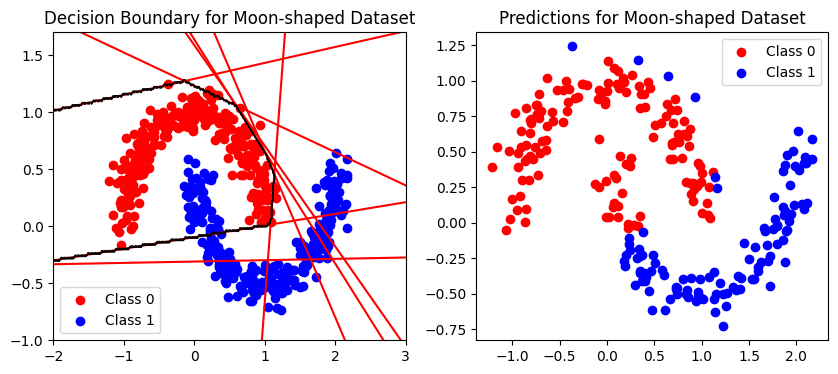

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 50, Learning Rate: 0.001

Accuracy = 0.888


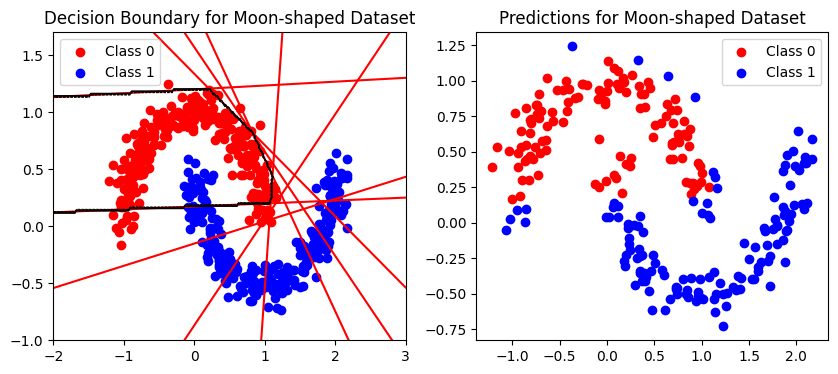

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.1

Accuracy = 0.884


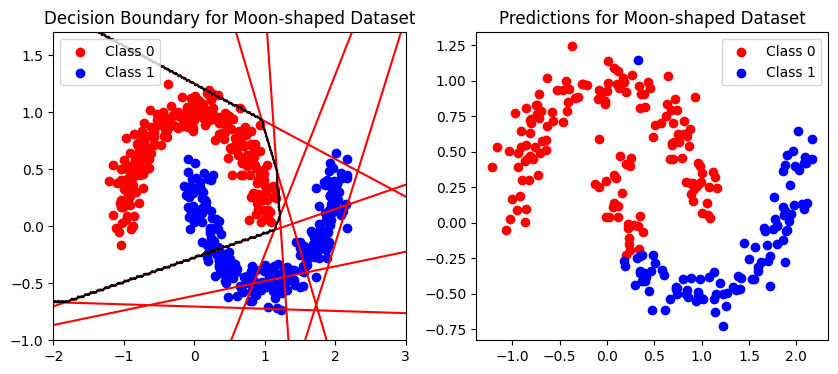

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.01

Accuracy = 0.892


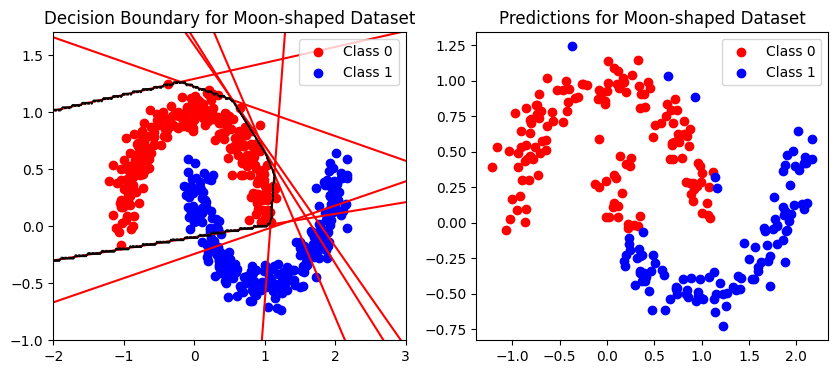

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 100, Learning Rate: 0.001

Accuracy = 0.868


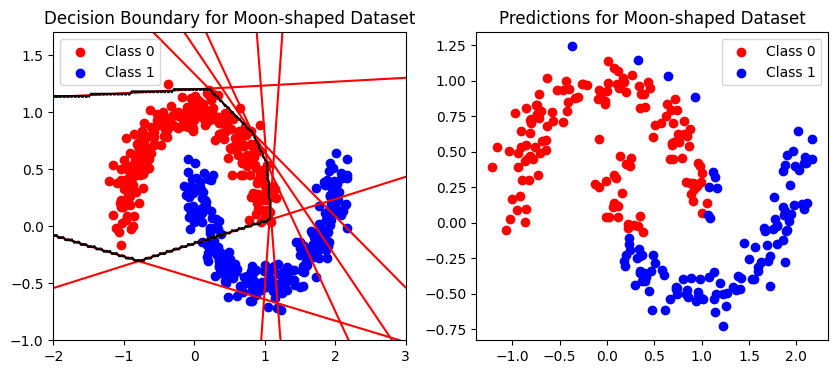

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.1

Accuracy = 0.892


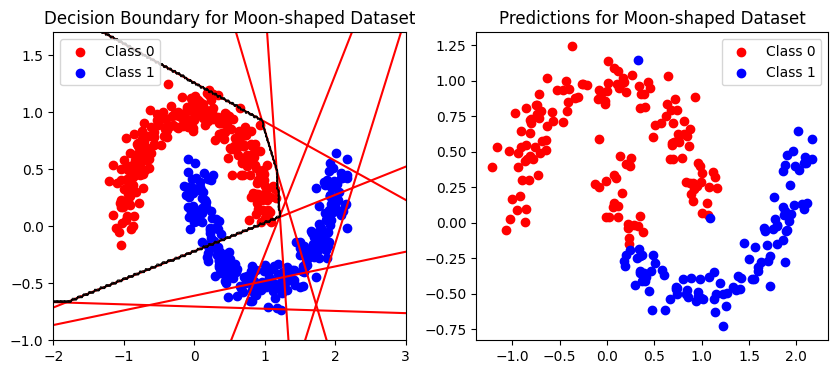

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.01

Accuracy = 0.872


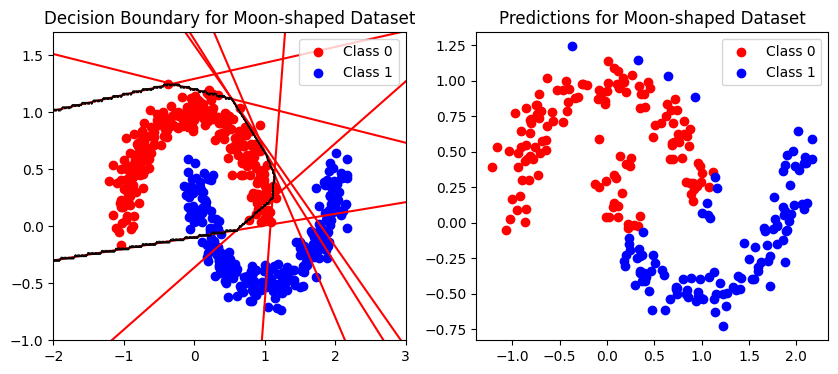

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 500, Learning Rate: 0.001

Accuracy = 0.872


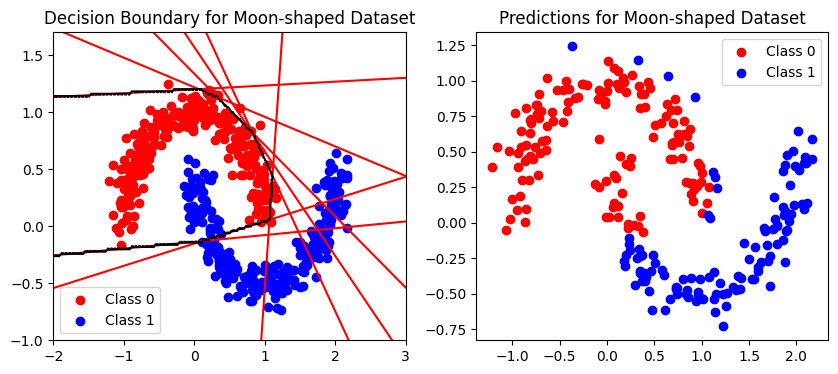

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.1

Accuracy = 0.872


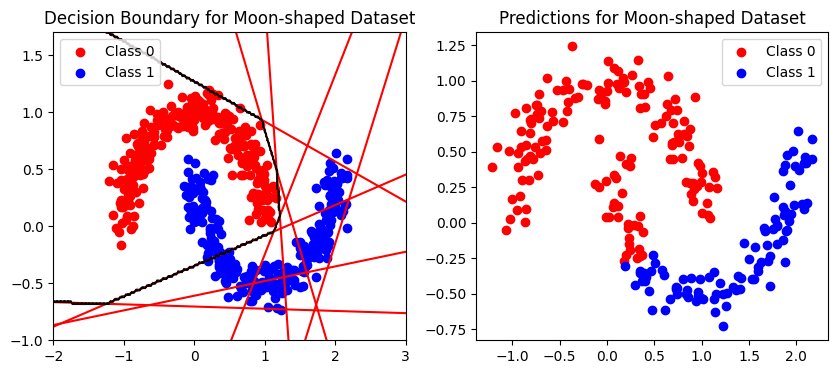

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.01

Accuracy = 0.876


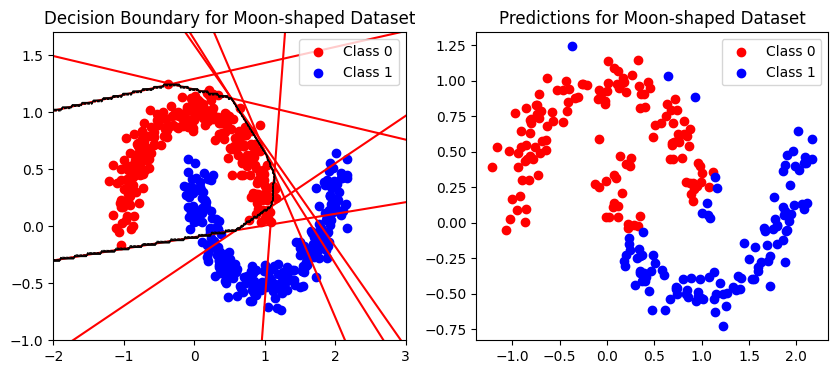

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Epoch: 2000, Learning Rate: 0.001

Accuracy = 0.872


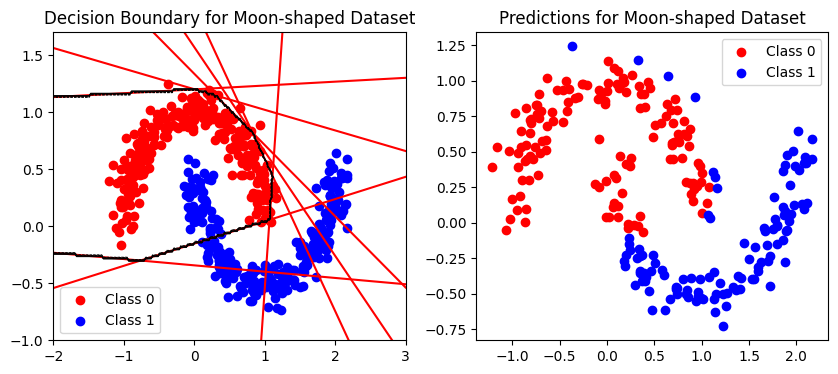

In [181]:
epoch = [50, 100, 500, 2000]
lrs = [0.1, 0.01, 0.001]
n = 8
for ep in epoch:
    for lr in lrs:
        model = MADALINE(n, ep, lr)
        model.fit(X_train_moons, Y_train_moons)
        pred = model.predict(X_test_moons)
        pred = np.array(pred)

        # change the prediction from 1 and -1 to 0 and 1
        pred[pred == -1] = 0

        accuracy = accuracy_score(pred, Y_test_moons)
        print(f'Epoch: {ep}, Learning Rate: {lr}')
        print("Accuracy =", accuracy)
        # model.plot_decision_boundary(X_moons, Y_moons)

        # plot the predictions for the test data and decision boundary in subplots
        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 2)
        plt.scatter(X_test_moons[pred == 0][:, 0], X_test_moons[pred == 0][:, 1], color='red', label='Class 0')
        plt.scatter(X_test_moons[pred == 1][:, 0], X_test_moons[pred == 1][:, 1], color='blue', label='Class 1')
        plt.legend()
        plt.title("Predictions for Moon-shaped Dataset")
        ax.legend()
        ax.set_title("Predictions for Moon-shaped Dataset")

        plt.subplot(1, 2, 1)
        for i in range(n):
            plt.axline((0, float(-model.hidden_biases[i] / model.hidden_weights[i][1])), slope=-model.hidden_weights[i][0] / model.hidden_weights[i][1], color="r")
        plt.scatter(X_moons[Y_moons == 0] [:, 0], X_moons[Y_moons == 0] [:, 1], color='red', label='Class 0')
        plt.scatter(X_moons[Y_moons == 1] [:, 0], X_moons[Y_moons == 1] [:, 1], color='blue', label='Class 1')
        h = 0.02
        x_min, x_max = X_moons[:, 0].min() - 1, X_moons[:, 0].max() + 1
        y_min, y_max = X_moons[:, 1].min() - 1, X_moons[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                            np.arange(y_min, y_max, h))
        Z = np.array(model.predict(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)
        plt.contour(xx, yy, Z, colors='black', linewidths=0.5)
        plt.legend()
        plt.xlim([-2, 3])
        plt.ylim([-1, 1.7])
        plt.title("Decision Boundary for Moon-shaped Dataset")

        plt.show()

        print("==========================================================")
        